# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own 

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *
from prepareDatabaseForMachineLearning import*

# Generating data

If you want to use multiprocessing to speed up the procces you should run runDatabaseGeneration.py instead of this notebook. This notebook is more for playing with the data then actualy generating it.

## Generating data

In [3]:
numberOfDatapoints = 100
numberOfSurroundingCells = 4
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1.0, 1.0]# The width of a singe cell.
filename = 'test2'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

In [4]:
data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Predicted amount of calculations: 20608400 for  100 datapoints.
Assuming 15 us per calculation, estimated time needed: 310 seconds
  1 % done, expected time left 307 seconds, 3 seconds since start.
  2 % done, expected time left 303 seconds, 6 seconds since start.
  3 % done, expected time left 300 seconds, 8 seconds since start.
  4 % done, expected time left 297 seconds, 11 seconds since start.
  5 % done, expected time left 294 seconds, 14 seconds since start.
  6 % done, expected time left 291 seconds, 17 seconds since start.
  7 % done, expected time left 288 seconds, 21 seconds since start.
  8 % done, expected time left 285 seconds, 25 seconds since start.
  9 % done, expected time left 282 seconds, 29 seconds since start.
 10 % done, expected time left 279 seconds, 34 seconds since start.
 11 % done, expected time left 276 seconds, 38 seconds since start.
 12 % done, expected time left 273 seconds, 42 seconds since start.
 13 % done, expected time left 269 seconds, 46 seconds s

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [5]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

dataRead.head()

"""
data = dataRead
#"""

'\ndata = dataRead\n#'

## Merging files

In [6]:
toMerge = ['test1', 'test2'] # File names of the things to merge.
outputFilename = 'testCombined'

dataFrames = []
for name in toMerge:
    imported = pd.read_json(name + '.json', orient='columns')
    #imported['particleCoordinates'] = imported['particleCoordinates'].apply(np.array)
    dataFrames.append(imported)

total = pd.concat(dataFrames, ignore_index = True, sort = False)
total.to_json(outputFilename + '.json', orient='columns')

## Inspecting data

In [7]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.4089605092228087, 0.2511813787109489], [0....",1.0,4,6.436855e+10
1,"[[0.6048291708398208, 0.48913295203897245], [0...",1.0,4,1.273950e+10
2,"[[0.19813094091990935, 0.4199616302128176], [0...",1.0,4,1.234322e+13
3,"[[0.15083960704404253, 0.16758571820664925], [...",1.0,4,1.261812e+15
4,"[[0.47818939150820383, 0.06253722786400939], [...",1.0,4,8.924049e+06


In [8]:
data.describe()

,widthOfCell,numberOfSurroundingCells,potentialEnergy
count,100.0,100.0,1.000000e+02
mean,1.0,4.0,3.262927e+18
std,0.0,0.0,3.261726e+19
min,1.0,4.0,2.010100e+06
25%,1.0,4.0,6.186404e+07
50%,1.0,4.0,8.561726e+08
75%,1.0,4.0,1.486344e+10
max,1.0,4.0,3.261737e+20


Plotting datapoint  0  with energy  64368551074.895546


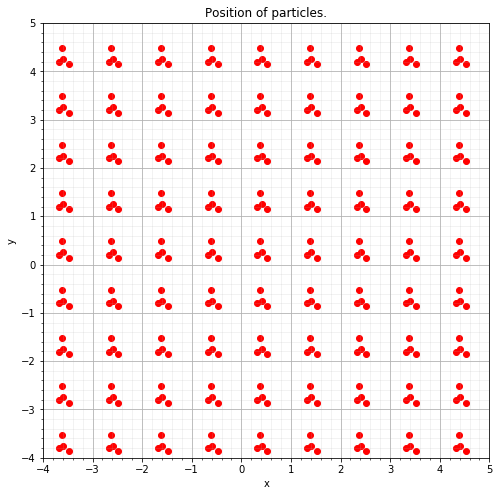

Plotting datapoint  1  with energy  12739502618.725304


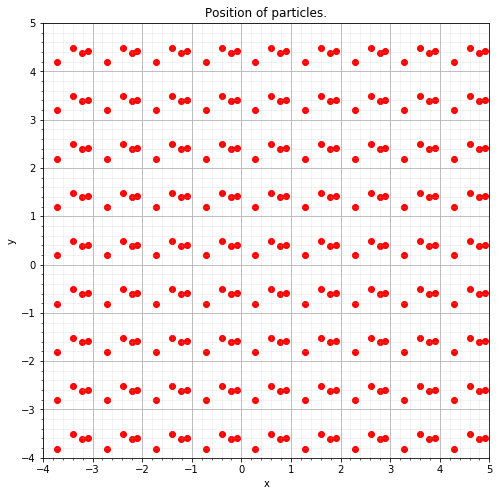

Plotting datapoint  2  with energy  12343220097948.492


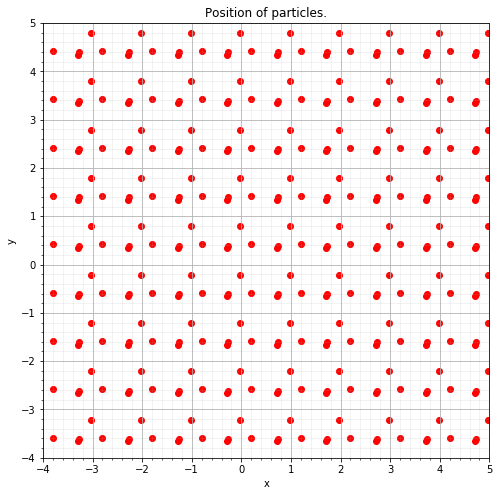

Plotting datapoint  3  with energy  1261811552260115.0


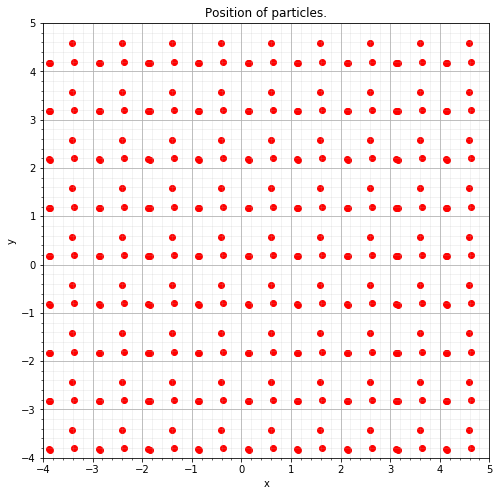

Plotting datapoint  4  with energy  8924049.190710938


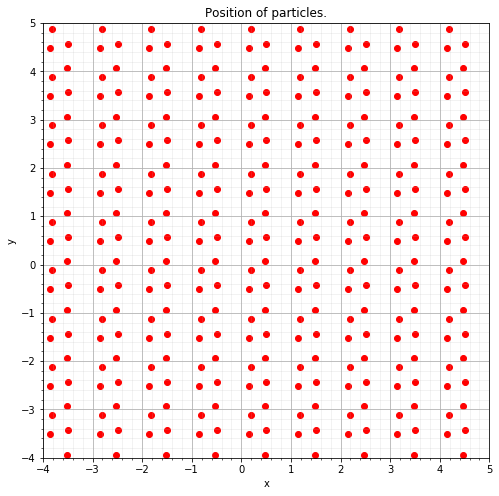

Plotting datapoint  5  with energy  7190040689.402724


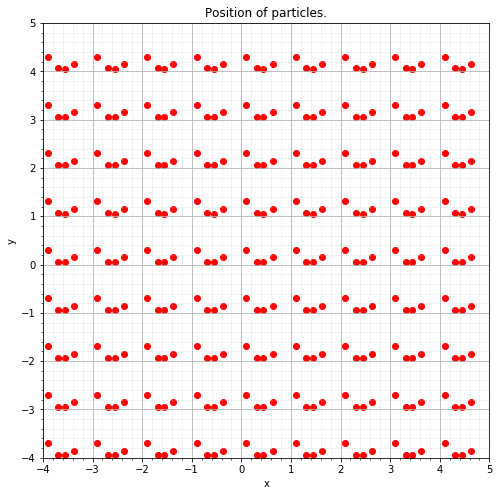

Plotting datapoint  6  with energy  1961622695.4069993


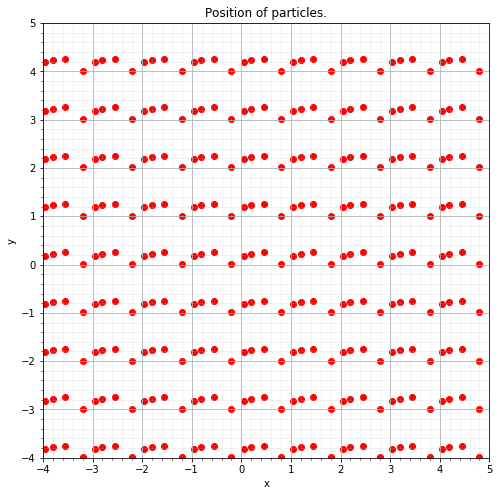

Plotting datapoint  7  with energy  63561137.66523301


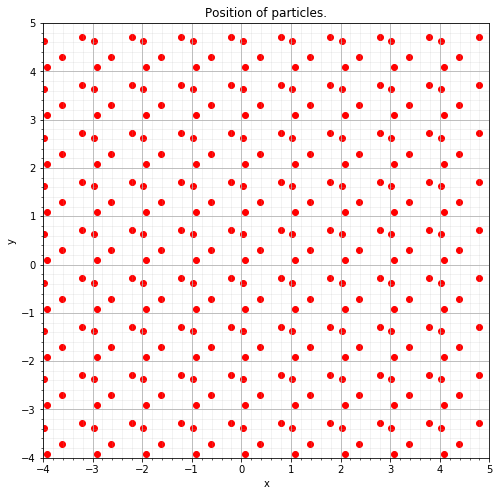

Plotting datapoint  8  with energy  659102945.2083962


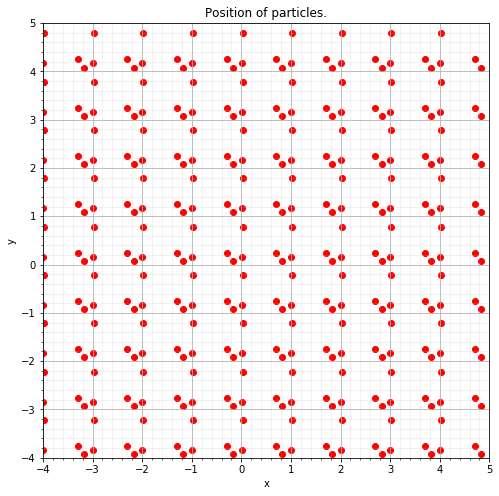

Plotting datapoint  9  with energy  2161675829.013814


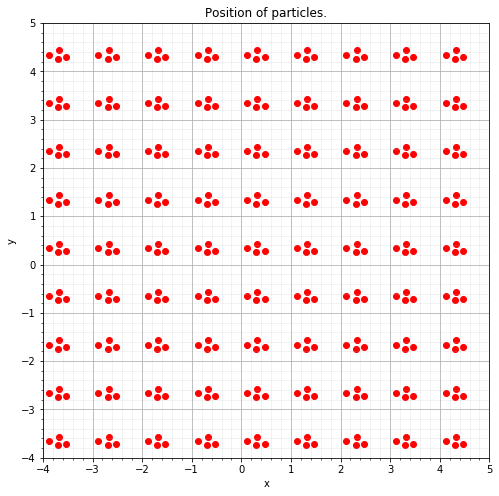

In [9]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

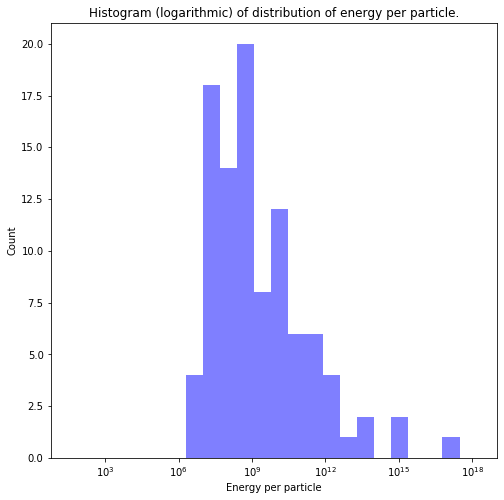

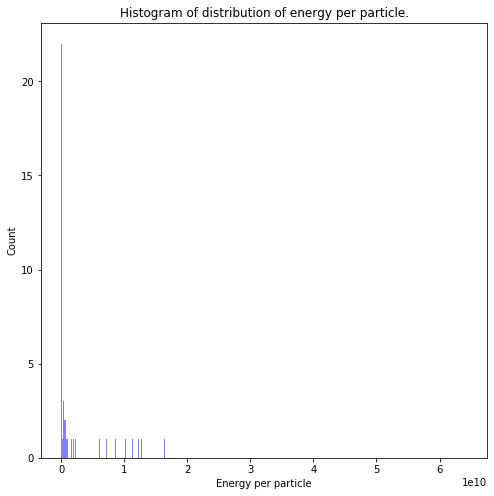

In [10]:
qLow = data['potentialEnergy'].quantile(0)
qHi  = data['potentialEnergy'].quantile(0.99)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
bins = [5**i for i in range(-50, 51)]

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, bins = bins, facecolor='blue', alpha=0.5)
ax.set_xscale('log')
ax.set_xlim(max(math.floor(math.log(min(x)) / math.log(10)), 10**-15), math.pow(10, 1 + math.ceil(math.log(max(x)) / math.log(10))))
ax.set_title('Histogram (logarithmic) of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

qLow = data['potentialEnergy'].quantile(0.05)
qHi  = data['potentialEnergy'].quantile(0.80)
dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]
x = dataFiltered['potentialEnergy']
numBins = 1000

fig, ax = plt.subplots(figsize=(8, 8))
n, bins, patches = ax.hist(x, numBins, facecolor='blue', alpha=0.5)
ax.set_title('Histogram of distribution of energy per particle.')
ax.set_xlabel('Energy per particle')
ax.set_ylabel('Count')
plt.show()

# Prepare database for machine learning

In [11]:
dataPrepared = prepareDatabseForMachineLearning(data, [-1, -2])

  1 % done, expected time left 2 seconds, 1 seconds since start.
  2 % done, expected time left 2 seconds, 1 seconds since start.
  3 % done, expected time left 2 seconds, 1 seconds since start.
  4 % done, expected time left 2 seconds, 1 seconds since start.
  5 % done, expected time left 2 seconds, 1 seconds since start.
  6 % done, expected time left 2 seconds, 1 seconds since start.
  7 % done, expected time left 2 seconds, 1 seconds since start.
  8 % done, expected time left 2 seconds, 1 seconds since start.
  9 % done, expected time left 2 seconds, 1 seconds since start.
 10 % done, expected time left 2 seconds, 1 seconds since start.
 11 % done, expected time left 2 seconds, 1 seconds since start.
 12 % done, expected time left 2 seconds, 1 seconds since start.
 13 % done, expected time left 2 seconds, 1 seconds since start.
 14 % done, expected time left 2 seconds, 1 seconds since start.
 15 % done, expected time left 1 seconds, 1 seconds since start.
 16 % done, expected time

In [12]:
print(dataPrepared['eigenvalues'][0])

dataPrepared.head()

[array([127.89104155, -10.11853521,  -4.17829309,  -2.06876963]), array([ 167.42096498, -100.91813993,   -0.37050814,  -15.14175884])]


,index,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy,eigenvalues
0,0,"[[0.4089605092228087, 0.2511813787109489], [0....",1.0,4,6.436855e+10,"[[127.89104154549369, -10.118535209410702, -4...."
1,1,"[[0.6048291708398208, 0.48913295203897245], [0...",1.0,4,1.273950e+10,"[[123.6892169480323, -8.355340560226367, -3.10..."
2,2,"[[0.19813094091990935, 0.4199616302128176], [0...",1.0,4,1.234322e+13,"[[128.14877302886688, 5.164873277051419, -2.48..."
3,3,"[[0.15083960704404253, 0.16758571820664925], [...",1.0,4,1.261812e+15,"[[137.10556957967148, -34.411467608572835, 11...."
4,4,"[[0.47818939150820383, 0.06253722786400939], [...",1.0,4,8.924049e+06,"[[119.76156064216391, -3.323727702070294, -2.2..."
